# Veri Kurulumu ve Kütüphaneler

**Bu projede evlerin tehlike oranlarının Hazard sütünunda belirlendiği bir skoru tahminlemeye çalışacağız, kolonlardaki değerler tehlike skorunu etkiliyor. Önceki Projelerden farklı olarak biraz daha istatistik bilgisinin ön plana çıktığı bir proje oldu, çarpıklı ve basıklığa da (skewness ve kurtosis) bakmam gerektiğini internette buldum.**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # library of statistical functions
import warnings
warnings.filterwarnings("ignore") # warnings filter to never print matching warnings

In [34]:
train = pd.read_csv('train.csv')

In [35]:
train

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,...,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,...,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,...,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,...,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,...,1,22,1,2,7,N,N,E,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50994,101992,7,12,24,1,N,H,Y,B,B,...,4,25,2,9,7,Y,Y,E,4,1
50995,101993,4,12,17,4,N,K,N,B,B,...,2,37,1,4,7,N,N,A,5,2
50996,101994,3,18,7,5,W,B,Y,B,B,...,2,28,1,1,2,N,N,E,1,1
50997,101998,14,18,17,5,B,A,N,B,D,...,1,40,1,7,4,Y,N,C,2,6


In [36]:
for col in train.columns: 
    print('{} :{} ' . format(col.upper(), train[col].unique()))

ID :[     1      2      3 ... 101994 101998 101999] 
HAZARD :[ 1  4  5  7 15 14  8 16  6 11  3 13  2 18 10 17 22  9 21 20 12 19 37 23
 28 27 31 38 41 26 33 29 30 25 24 36 51 42 34 46 32 69 40 35 44 39 49 52
 63 64] 
T1_V1 :[15 16 10 18 13 14  8  5  4  3 11  9  7 12  6 19  1  2 17] 
T1_V2 :[ 3 14 10 18 19 12 17 20  2  4  7 15 23  6 13  5 21 11  1  8  9 16 22 24] 
T1_V3 :[2 5 1 4 3 6 9 7 8] 
T1_V4 :['N' 'H' 'E' 'W' 'B' 'C' 'S' 'G'] 
T1_V5 :['B' 'K' 'H' 'C' 'I' 'A' 'D' 'J' 'E' 'L'] 
T1_V6 :['N' 'Y'] 
T1_V7 :['B' 'D' 'A' 'C'] 
T1_V8 :['B' 'D' 'A' 'C'] 
T1_V9 :['D' 'C' 'E' 'F' 'B' 'G'] 
T1_V10 :[ 7 12  3  8  2] 
T1_V11 :['B' 'H' 'I' 'M' 'L' 'J' 'E' 'A' 'F' 'N' 'D' 'K'] 
T1_V12 :['B' 'C' 'D' 'A'] 
T1_V13 :[15 10 20  5] 
T1_V14 :[1 3 2 4 0] 
T1_V15 :['A' 'D' 'C' 'H' 'N' 'S' 'W' 'F'] 
T1_V16 :['B' 'R' 'J' 'K' 'D' 'C' 'N' 'E' 'I' 'F' 'M' 'H' 'A' 'Q' 'G' 'L' 'P' 'O'] 
T1_V17 :['N' 'Y'] 
T2_V1 :[ 36  78  71  75  65 100  83  20  88  86  23  49  92  41  33  81  72  77
  61  38  18  32  98  60  52  

In [38]:
objectCol = list(train.select_dtypes(include=['object']).columns)

for col in objectCol:
    train[col] = train[col].astype("category")
    #test[col] = test[col].astype("category")

In [39]:
train.corr()['Hazard']

Id        0.006340
Hazard    1.000000
T1_V1     0.057817
T1_V2     0.103267
T1_V3     0.057942
T1_V10   -0.002556
T1_V13   -0.001011
T1_V14   -0.074026
T2_V1    -0.019824
T2_V2    -0.009940
T2_V4     0.036273
T2_V6     0.020143
T2_V7     0.004259
T2_V8     0.001084
T2_V9    -0.053852
T2_V10   -0.005671
T2_V14    0.029673
T2_V15    0.069263
Name: Hazard, dtype: float64

In [40]:
abs(train.corr()['Hazard']).sort_values(ascending=False).head(25)

Hazard    1.000000
T1_V2     0.103267
T1_V14    0.074026
T2_V15    0.069263
T1_V3     0.057942
T1_V1     0.057817
T2_V9     0.053852
T2_V4     0.036273
T2_V14    0.029673
T2_V6     0.020143
T2_V1     0.019824
T2_V2     0.009940
Id        0.006340
T2_V10    0.005671
T2_V7     0.004259
T1_V10    0.002556
T2_V8     0.001084
T1_V13    0.001011
Name: Hazard, dtype: float64

## Ram Kullanımı Azaltma

In [44]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object and str(col_type) != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [45]:
df_train = reduce_mem_usage(train)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Id      50999 non-null  int32   
 1   Hazard  50999 non-null  int8    
 2   T1_V1   50999 non-null  int8    
 3   T1_V2   50999 non-null  int8    
 4   T1_V3   50999 non-null  int8    
 5   T1_V4   50999 non-null  category
 6   T1_V5   50999 non-null  category
 7   T1_V6   50999 non-null  category
 8   T1_V7   50999 non-null  category
 9   T1_V8   50999 non-null  category
 10  T1_V9   50999 non-null  category
 11  T1_V10  50999 non-null  int8    
 12  T1_V11  50999 non-null  category
 13  T1_V12  50999 non-null  category
 14  T1_V13  50999 non-null  int8    
 15  T1_V14  50999 non-null  int8    
 16  T1_V15  50999 non-null  category
 17  T1_V16  50999 non-null  category
 18  T1_V17  50999 non-null  category
 19  T2_V1   50999 non-null  int8    
 20  T2_V2   50999 non-null  int8    
 21  T2_V3   5099

In [47]:
df_numerical_cols = df_train.select_dtypes(exclude='object').select_dtypes(exclude='category').columns.tolist()

['Id',
 'Hazard',
 'T1_V1',
 'T1_V2',
 'T1_V3',
 'T1_V10',
 'T1_V13',
 'T1_V14',
 'T2_V1',
 'T2_V2',
 'T2_V4',
 'T2_V6',
 'T2_V7',
 'T2_V8',
 'T2_V9',
 'T2_V10',
 'T2_V14',
 'T2_V15']

In [50]:
df_numerical_cols

['Id',
 'Hazard',
 'T1_V1',
 'T1_V2',
 'T1_V3',
 'T1_V10',
 'T1_V13',
 'T1_V14',
 'T2_V1',
 'T2_V2',
 'T2_V4',
 'T2_V6',
 'T2_V7',
 'T2_V8',
 'T2_V9',
 'T2_V10',
 'T2_V14',
 'T2_V15']

In [48]:
df_categorical_cols = [i for i in df_train.columns if i not in df_numerical_cols]

In [49]:
df_categorical_cols

['T1_V4',
 'T1_V5',
 'T1_V6',
 'T1_V7',
 'T1_V8',
 'T1_V9',
 'T1_V11',
 'T1_V12',
 'T1_V15',
 'T1_V16',
 'T1_V17',
 'T2_V3',
 'T2_V5',
 'T2_V11',
 'T2_V12',
 'T2_V13']

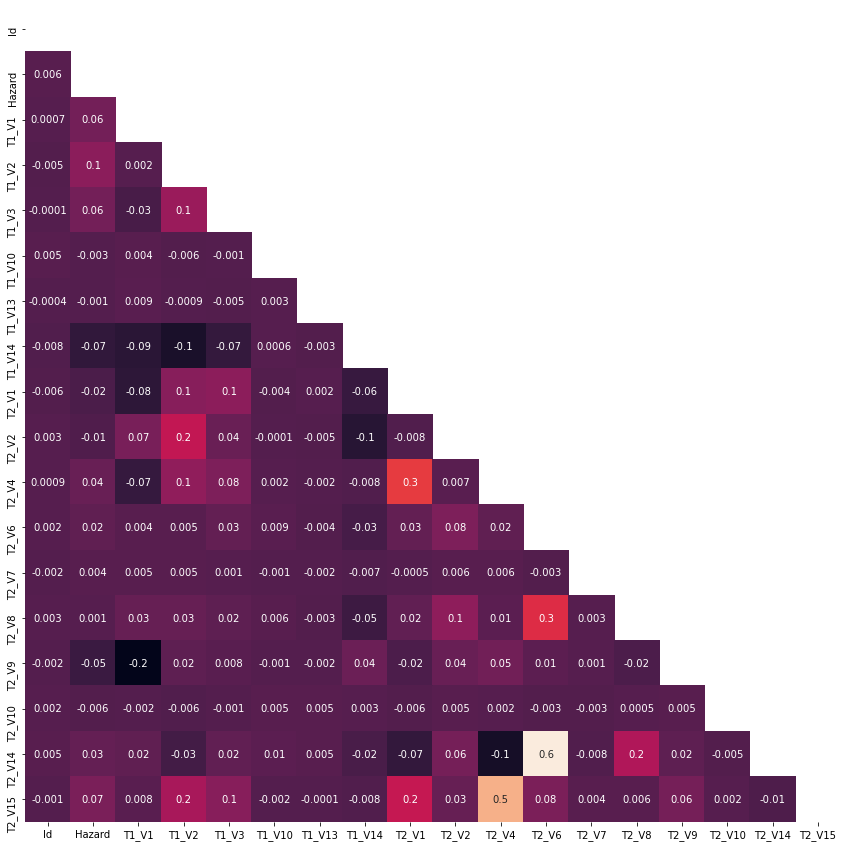

In [55]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 15))
matrix = np.triu(df_train.corr())
sns.heatmap(corrmat, square=True, annot=True, fmt='.1g',  cbar=False, mask=matrix);

**Yüksek Korelasyona sahip veriler yok**

## Çarpıklık ve Basıklık

In [56]:
df_train.skew(axis = 0, skipna = True)

Id        0.002478
Hazard    2.547939
T1_V1     0.166289
T1_V2    -0.270684
T1_V3     0.586082
T1_V10    0.057731
T1_V13   -0.102996
T1_V14    0.964177
T2_V1    -0.018755
T2_V2     1.189851
T2_V4     0.297645
T2_V6     1.771966
T2_V7    -0.512302
T2_V8     6.654605
T2_V9    -0.165072
T2_V10   -0.283482
T2_V14    1.131581
T2_V15    1.224774
dtype: float64

## Veri İşleme ( Çarpıklığı Azaltma)

Old skew of T2_V2: -0.60
New skew of T2_V2: -2.28


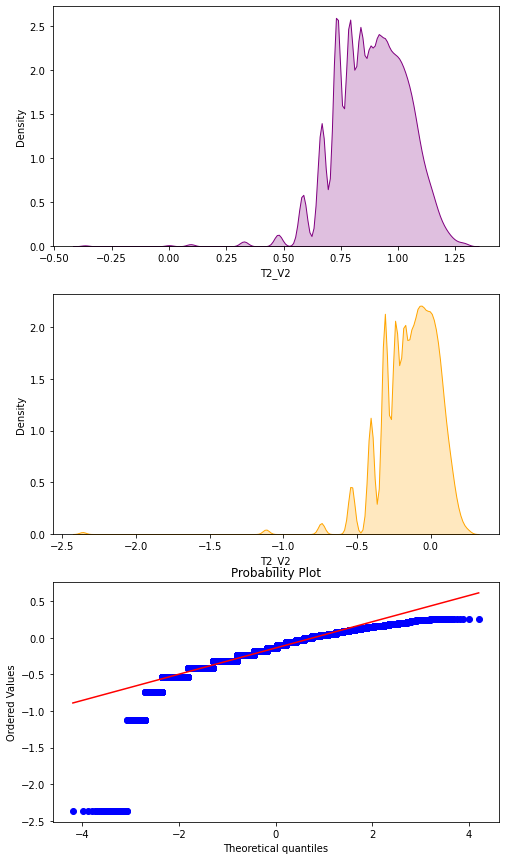

In [60]:
col = 'T2_V2'
fig, axs = plt.subplots(3)
fig.set_figwidth(8)
fig.set_figheight(15)
sns.kdeplot(df_train[col],color='Purple',fill=True, ax=axs[0])
print("Old skew of %s: %.2f" % (col,df_train[col].skew(axis = 0, skipna = True)))
# Removing the skewness using a log function and checking the distribution again
df_train[col] = df_train[col].map(lambda i : np.log(i) if i > 0 else 0)
sns.kdeplot(df_train[col],color='Orange',fill=True, ax=axs[1])
stats.probplot(df_train[col], dist="norm", plot=axs[2])
print("New skew of %s: %.2f" % (col,df_train[col].skew(axis = 0, skipna = True)))


Old skew of T2_V6: 1.77
New skew of T2_V6: -0.06


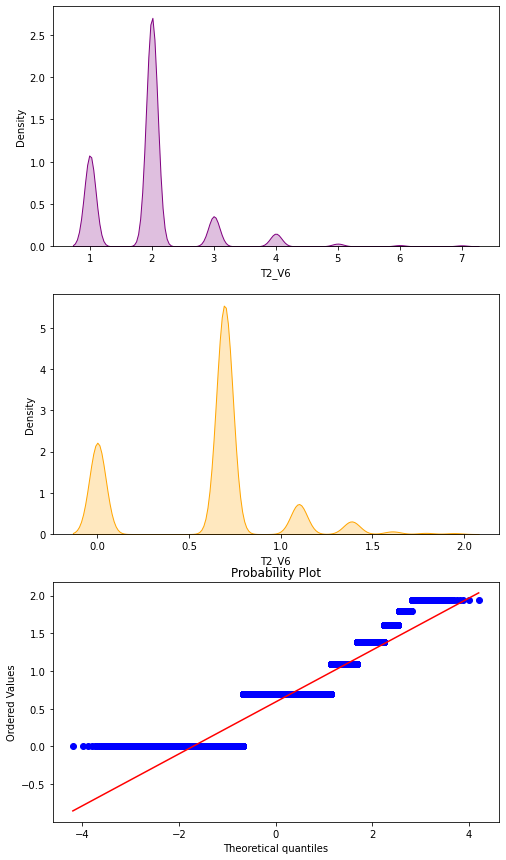

In [61]:
col = 'T2_V6'
fig, axs = plt.subplots(3)
fig.set_figwidth(8)
fig.set_figheight(15)
sns.kdeplot(df_train[col],color='Purple',fill=True, ax=axs[0])
print("Old skew of %s: %.2f" % (col,df_train[col].skew(axis = 0, skipna = True)))
# Removing the skewness using a log function and checking the distribution again
df_train[col] = df_train[col].map(lambda i : np.log(i) if i > 0 else 0)
sns.kdeplot(df_train[col],color='Orange',fill=True, ax=axs[1])
stats.probplot(df_train[col], dist="norm", plot=axs[2])
print("New skew of %s: %.2f" % (col,df_train[col].skew(axis = 0, skipna = True)))


Old skew of T2_V14: 0.01
New skew of T2_V14: 0.49


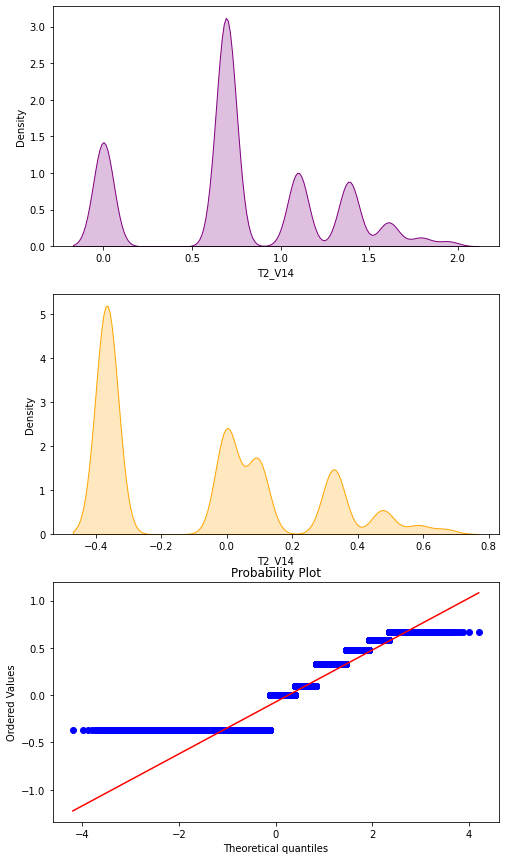

In [63]:
col = 'T2_V14'
fig, axs = plt.subplots(3)
fig.set_figwidth(8)
fig.set_figheight(15)
sns.kdeplot(df_train[col],color='Purple',fill=True, ax=axs[0])
print("Old skew of %s: %.2f" % (col,df_train[col].skew(axis = 0, skipna = True)))
# Removing the skewness using a log function and checking the distribution again
df_train[col] = df_train[col].map(lambda i : np.log(i) if i > 0 else 0)
sns.kdeplot(df_train[col],color='Orange',fill=True, ax=axs[1])
stats.probplot(df_train[col], dist="norm", plot=axs[2])
print("New skew of %s: %.2f" % (col,df_train[col].skew(axis = 0, skipna = True)))


Old skew of T2_V15: 1.22
New skew of T2_V15: 0.34


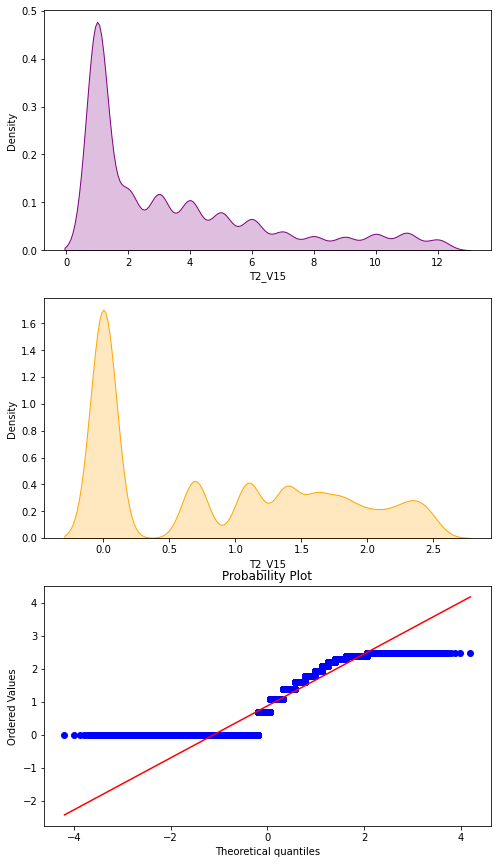

In [64]:
col = 'T2_V15'
fig, axs = plt.subplots(3)
fig.set_figwidth(8)
fig.set_figheight(15)
sns.kdeplot(df_train[col],color='Purple',fill=True, ax=axs[0])
print("Old skew of %s: %.2f" % (col,df_train[col].skew(axis = 0, skipna = True)))
# Removing the skewness using a log function and checking the distribution again
df_train[col] = df_train[col].map(lambda i : np.log(i) if i > 0 else 0)
sns.kdeplot(df_train[col],color='Orange',fill=True, ax=axs[1])
stats.probplot(df_train[col], dist="norm", plot=axs[2])
print("New skew of %s: %.2f" % (col,df_train[col].skew(axis = 0, skipna = True)))

In [72]:
abs(train.corr()['Hazard']).sort_values(ascending=False).head(25)

Hazard    1.000000
T1_V2     0.103267
T1_V14    0.074026
T2_V15    0.068894
T1_V3     0.057942
T1_V1     0.057817
T2_V9     0.053852
T2_V4     0.036273
T2_V14    0.031429
T2_V1     0.019824
T2_V6     0.019788
Id        0.006340
T2_V10    0.005671
T2_V2     0.004935
T2_V7     0.004259
T1_V10    0.002556
T2_V8     0.001084
T1_V13    0.001011
Name: Hazard, dtype: float64

In [73]:
X = train.drop('Hazard', axis=1)

In [74]:
X = pd.get_dummies(X)

In [75]:
y = train['Hazard']

In [76]:
from sklearn.linear_model import LinearRegression #SKLEARN = Science Kit Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
L = LinearRegression()
E = ElasticNet()
R = Ridge()
Lass = Lasso()
ETR = ExtraTreeRegressor()
GBR = GradientBoostingRegressor()
XGBC = XGBRegressor()
def algo_test(x, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)
    
    algos = [L, E, R, Lass, ETR, GBR, XGBC]
    algo_names= ['Linear', 'ElasticNet', 'Ridge', 'Lasso', 'Extra Tree', 'Gradient Boosting', 'XGBRegressor']
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns = ['R_Squared', 'RMSE', 'MAE'],
                           index = algo_names)
    
    for algo in algos:
        algo.fit(X_train, y_train)
        algo.predict(X_test)
        
        r_squared.append(r2_score(y_test, algo.predict(X_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(X_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(X_test)))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending=False)

In [78]:
algo_test(X, y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.122696,3.741236,2.695793
Ridge,0.105966,3.776740,2.722342
Linear,0.105910,3.776859,2.722519
XGBRegressor,0.085820,3.819055,2.745037
ElasticNet,0.016231,3.961745,2.819401
Lasso,0.012441,3.969369,2.817464
Extra Tree,-0.930867,5.550296,3.732255
